#Hyper tuning

In [ ]:
! pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 8.6 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.metrics import accuracy_score

def objective(trial):
    # Define the hyperparameters to tune
    units = trial.suggest_int('units', 16, 256)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-1, log=True)
    optimizer_name = trial.suggest_categorical('optimizer', ['adam', 'rmsprop', 'nadam'])
    l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64, 128])

   
    num_features = X_processed.shape[1] 
    input_shape = (num_features,)  

    model = Sequential([
       
        Reshape((1, num_features), input_shape=input_shape),
        LSTM(units, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),
        Dense(3, activation='softmax')  
    ])

    # Define the optimizer
    if optimizer_name == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_name == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer_name == 'nadam':
        optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rate)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer_name}")

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=20, verbose=0)

    # Evaluate the model on the validation set
    y_val_pred = model.predict(X_test)
    y_val_pred_binary = np.argmax(y_val_pred, axis=1)
    accuracy = accuracy_score(y_test, y_val_pred_binary)

    # Return the accuracy as the performance metric
    return accuracy

In [ ]:
# Define the study name and storage location
study_name = "LSTM_hypertune"
storage = "sqlite:///LSTM_hypertune.db"
study = optuna.create_study(direction='maximize', study_name=study_name, storage=storage)
study.optimize(objective, n_trials=50)

# Get the best hyperparameters and their performance
best_params = study.best_params
best_accuracy = study.best_value

print("Best Hyperparameters:")
for key, value in best_params.items():
    print(f"{key}: {value}")

print(f"Best Accuracy: {best_accuracy:.2f}")

[I 2024-04-11 14:00:18,066] A new study created in RDB with name: NN2
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 2ms/step


[I 2024-04-11 14:02:45,114] Trial 0 finished with value: 0.7645444566410537 and parameters: {'units': 93, 'learning_rate': 0.008788989532277552, 'optimizer': 'adam', 'l2_reg': 0.08729566361896335, 'batch_size': 64}. Best is trial 0 with value: 0.7645444566410537.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 2ms/step


[I 2024-04-11 14:05:19,023] Trial 1 finished with value: 0.8166849615806806 and parameters: {'units': 140, 'learning_rate': 0.0025520852269816123, 'optimizer': 'nadam', 'l2_reg': 9.871290572183403e-05, 'batch_size': 32}. Best is trial 1 with value: 0.8166849615806806.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 3ms/step


[I 2024-04-11 14:08:44,342] Trial 2 finished with value: 0.8207098426637395 and parameters: {'units': 205, 'learning_rate': 0.00020873779915189786, 'optimizer': 'adam', 'l2_reg': 2.1531841401556255e-05, 'batch_size': 32}. Best is trial 2 with value: 0.8207098426637395.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 3ms/step


[I 2024-04-11 14:11:08,921] Trial 3 finished with value: 0.818880351262349 and parameters: {'units': 251, 'learning_rate': 0.00041878903188712107, 'optimizer': 'adam', 'l2_reg': 0.0016642371591390327, 'batch_size': 64}. Best is trial 2 with value: 0.8207098426637395.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 0s 2ms/step


[I 2024-04-11 14:11:42,449] Trial 4 finished with value: 0.8166849615806806 and parameters: {'units': 76, 'learning_rate': 0.015949287963998346, 'optimizer': 'rmsprop', 'l2_reg': 4.95113318550004e-05, 'batch_size': 128}. Best is trial 2 with value: 0.8207098426637395.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 3ms/step


[I 2024-04-11 14:13:40,156] Trial 5 finished with value: 0.8181485547017929 and parameters: {'units': 208, 'learning_rate': 0.00027197675222587247, 'optimizer': 'nadam', 'l2_reg': 1.2286340435726532e-05, 'batch_size': 64}. Best is trial 2 with value: 0.8207098426637395.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 3ms/step


[I 2024-04-11 14:17:05,787] Trial 6 finished with value: 0.8285766556897183 and parameters: {'units': 244, 'learning_rate': 0.0010785609014660003, 'optimizer': 'adam', 'l2_reg': 7.56841458323909e-05, 'batch_size': 32}. Best is trial 6 with value: 0.8285766556897183.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 0s 2ms/step


[I 2024-04-11 14:20:31,337] Trial 7 finished with value: 0.7416758141236737 and parameters: {'units': 85, 'learning_rate': 0.01127367991743629, 'optimizer': 'nadam', 'l2_reg': 0.04032702766587862, 'batch_size': 16}. Best is trial 6 with value: 0.8285766556897183.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 2ms/step


[I 2024-04-11 14:22:55,630] Trial 8 finished with value: 0.7446030003658983 and parameters: {'units': 157, 'learning_rate': 1.4951021934379e-05, 'optimizer': 'rmsprop', 'l2_reg': 4.564295329959031e-05, 'batch_size': 64}. Best is trial 6 with value: 0.8285766556897183.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 3ms/step


[I 2024-04-11 14:27:20,710] Trial 9 finished with value: 0.8150384193194292 and parameters: {'units': 256, 'learning_rate': 0.004855682776542134, 'optimizer': 'nadam', 'l2_reg': 0.009056618588382486, 'batch_size': 32}. Best is trial 6 with value: 0.8285766556897183.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 0s 2ms/step


[I 2024-04-11 14:27:46,049] Trial 10 finished with value: 0.7815587266739846 and parameters: {'units': 20, 'learning_rate': 0.07461820781501287, 'optimizer': 'adam', 'l2_reg': 0.000325784721374119, 'batch_size': 128}. Best is trial 6 with value: 0.8285766556897183.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 3ms/step


[I 2024-04-11 14:31:10,681] Trial 11 finished with value: 0.8091840468349799 and parameters: {'units': 197, 'learning_rate': 6.0685260978155745e-05, 'optimizer': 'adam', 'l2_reg': 1.5880447241270118e-05, 'batch_size': 32}. Best is trial 6 with value: 0.8285766556897183.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 3ms/step


[I 2024-04-11 14:34:15,402] Trial 12 finished with value: 0.8172338090010977 and parameters: {'units': 209, 'learning_rate': 0.0007109837395657758, 'optimizer': 'adam', 'l2_reg': 0.0004382573630301129, 'batch_size': 32}. Best is trial 6 with value: 0.8285766556897183.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 2ms/step


[I 2024-04-11 14:37:06,847] Trial 13 finished with value: 0.809915843395536 and parameters: {'units': 180, 'learning_rate': 8.089033829696652e-05, 'optimizer': 'adam', 'l2_reg': 0.00014926218531580125, 'batch_size': 32}. Best is trial 6 with value: 0.8285766556897183.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 3ms/step


[I 2024-04-11 14:43:05,074] Trial 14 finished with value: 0.8146725210391511 and parameters: {'units': 230, 'learning_rate': 0.00012247939470942066, 'optimizer': 'adam', 'l2_reg': 0.002005981423221969, 'batch_size': 16}. Best is trial 6 with value: 0.8285766556897183.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 3ms/step


[I 2024-04-11 14:46:30,390] Trial 15 finished with value: 0.8247347237467983 and parameters: {'units': 171, 'learning_rate': 0.0015008560248951405, 'optimizer': 'adam', 'l2_reg': 2.82671231948167e-05, 'batch_size': 32}. Best is trial 6 with value: 0.8285766556897183.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 2ms/step


[I 2024-04-11 14:48:27,111] Trial 16 finished with value: 0.8161361141602634 and parameters: {'units': 118, 'learning_rate': 0.0018981764166456667, 'optimizer': 'rmsprop', 'l2_reg': 0.0004373811151787409, 'batch_size': 32}. Best is trial 6 with value: 0.8285766556897183.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 3ms/step


[I 2024-04-11 14:51:11,659] Trial 17 finished with value: 0.8165020124405415 and parameters: {'units': 165, 'learning_rate': 0.0009752902382452334, 'optimizer': 'adam', 'l2_reg': 6.087069564841888e-05, 'batch_size': 32}. Best is trial 6 with value: 0.8285766556897183.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 2ms/step


[I 2024-04-11 14:54:39,454] Trial 18 finished with value: 0.7789974387120381 and parameters: {'units': 121, 'learning_rate': 0.03548299072989343, 'optimizer': 'adam', 'l2_reg': 0.00020294959110468596, 'batch_size': 16}. Best is trial 6 with value: 0.8285766556897183.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 3ms/step


[I 2024-04-11 14:55:53,235] Trial 19 finished with value: 0.8047932674716429 and parameters: {'units': 230, 'learning_rate': 0.0028324096757194393, 'optimizer': 'rmsprop', 'l2_reg': 0.004488160297196571, 'batch_size': 128}. Best is trial 6 with value: 0.8285766556897183.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 3ms/step


[I 2024-04-11 14:57:16,752] Trial 20 finished with value: 0.7749725576289791 and parameters: {'units': 40, 'learning_rate': 2.7529049182089537e-05, 'optimizer': 'adam', 'l2_reg': 3.0807666721719925e-05, 'batch_size': 32}. Best is trial 6 with value: 0.8285766556897183.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 3ms/step


[I 2024-04-11 15:00:13,858] Trial 21 finished with value: 0.8210757409440176 and parameters: {'units': 186, 'learning_rate': 0.00021708394185230445, 'optimizer': 'adam', 'l2_reg': 1.0762024263119254e-05, 'batch_size': 32}. Best is trial 6 with value: 0.8285766556897183.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 3ms/step


[I 2024-04-11 15:03:38,480] Trial 22 finished with value: 0.8252835711672155 and parameters: {'units': 176, 'learning_rate': 0.0006052653984401392, 'optimizer': 'adam', 'l2_reg': 1.0152608631067955e-05, 'batch_size': 32}. Best is trial 6 with value: 0.8285766556897183.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 2ms/step


[I 2024-04-11 15:06:00,322] Trial 23 finished with value: 0.8247347237467983 and parameters: {'units': 151, 'learning_rate': 0.0006340125700987825, 'optimizer': 'adam', 'l2_reg': 9.507724666040897e-05, 'batch_size': 32}. Best is trial 6 with value: 0.8285766556897183.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 3ms/step


[I 2024-04-11 15:09:25,064] Trial 24 finished with value: 0.8236370289059641 and parameters: {'units': 230, 'learning_rate': 0.0011627807358710104, 'optimizer': 'adam', 'l2_reg': 2.5503956609292488e-05, 'batch_size': 32}. Best is trial 6 with value: 0.8285766556897183.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 3ms/step


[I 2024-04-11 15:12:06,528] Trial 25 finished with value: 0.827661909989023 and parameters: {'units': 171, 'learning_rate': 0.004378155887522324, 'optimizer': 'adam', 'l2_reg': 3.330288863419538e-05, 'batch_size': 32}. Best is trial 6 with value: 0.8285766556897183.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 2ms/step


[I 2024-04-11 15:14:31,150] Trial 26 finished with value: 0.8197950969630443 and parameters: {'units': 122, 'learning_rate': 0.005624672328507601, 'optimizer': 'adam', 'l2_reg': 7.681577360270966e-05, 'batch_size': 32}. Best is trial 6 with value: 0.8285766556897183.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 3ms/step


[I 2024-04-11 15:20:55,742] Trial 27 finished with value: 0.7861324551774607 and parameters: {'units': 223, 'learning_rate': 0.02335758005747258, 'optimizer': 'adam', 'l2_reg': 0.0008423918180262769, 'batch_size': 16}. Best is trial 6 with value: 0.8285766556897183.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 3ms/step


[I 2024-04-11 15:22:21,452] Trial 28 finished with value: 0.8305890962312477 and parameters: {'units': 187, 'learning_rate': 0.003780186378825237, 'optimizer': 'nadam', 'l2_reg': 1.0912826975381359e-05, 'batch_size': 128}. Best is trial 28 with value: 0.8305890962312477.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 3ms/step


[I 2024-04-11 15:23:18,018] Trial 29 finished with value: 0.818880351262349 and parameters: {'units': 144, 'learning_rate': 0.006930648343848503, 'optimizer': 'nadam', 'l2_reg': 0.00016558066932449348, 'batch_size': 128}. Best is trial 28 with value: 0.8305890962312477.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 3ms/step


[I 2024-04-11 15:24:02,885] Trial 30 finished with value: 0.8282107574094402 and parameters: {'units': 100, 'learning_rate': 0.003974689411044659, 'optimizer': 'nadam', 'l2_reg': 3.8206766724720016e-05, 'batch_size': 128}. Best is trial 28 with value: 0.8305890962312477.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 3ms/step


[I 2024-04-11 15:24:39,912] Trial 31 finished with value: 0.823271130625686 and parameters: {'units': 62, 'learning_rate': 0.004170813367962689, 'optimizer': 'nadam', 'l2_reg': 3.430818530631999e-05, 'batch_size': 128}. Best is trial 28 with value: 0.8305890962312477.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 2ms/step


[I 2024-04-11 15:26:05,007] Trial 32 finished with value: 0.823088181485547 and parameters: {'units': 110, 'learning_rate': 0.002809896206989075, 'optimizer': 'nadam', 'l2_reg': 1.640623501918291e-05, 'batch_size': 128}. Best is trial 28 with value: 0.8305890962312477.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 3ms/step


[I 2024-04-11 15:27:29,993] Trial 33 finished with value: 0.8216245883644346 and parameters: {'units': 187, 'learning_rate': 0.009707586560131742, 'optimizer': 'nadam', 'l2_reg': 6.828874440829813e-05, 'batch_size': 128}. Best is trial 28 with value: 0.8305890962312477.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 3ms/step


[I 2024-04-11 15:28:14,011] Trial 34 finished with value: 0.8269301134284669 and parameters: {'units': 98, 'learning_rate': 0.002549680970588592, 'optimizer': 'nadam', 'l2_reg': 2.022568709400009e-05, 'batch_size': 128}. Best is trial 28 with value: 0.8305890962312477.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 2ms/step


[I 2024-04-11 15:29:06,963] Trial 35 finished with value: 0.8163190633004025 and parameters: {'units': 136, 'learning_rate': 0.017292824066259826, 'optimizer': 'nadam', 'l2_reg': 0.000142044852735553, 'batch_size': 128}. Best is trial 28 with value: 0.8305890962312477.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 5ms/step


[I 2024-04-11 15:31:32,702] Trial 36 finished with value: 0.823271130625686 and parameters: {'units': 242, 'learning_rate': 0.00034620445713104197, 'optimizer': 'nadam', 'l2_reg': 4.054558886576856e-05, 'batch_size': 64}. Best is trial 28 with value: 0.8305890962312477.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 4ms/step


[I 2024-04-11 15:32:46,170] Trial 37 finished with value: 0.814123673618734 and parameters: {'units': 212, 'learning_rate': 0.041373896140532794, 'optimizer': 'nadam', 'l2_reg': 2.0985506299112447e-05, 'batch_size': 128}. Best is trial 28 with value: 0.8305890962312477.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 2ms/step


[I 2024-04-11 15:33:31,413] Trial 38 finished with value: 0.7392974753018661 and parameters: {'units': 72, 'learning_rate': 0.0038766570147739945, 'optimizer': 'rmsprop', 'l2_reg': 0.07873083862526217, 'batch_size': 64}. Best is trial 28 with value: 0.8305890962312477.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 3ms/step


[I 2024-04-11 15:34:56,559] Trial 39 finished with value: 0.8256494694474936 and parameters: {'units': 197, 'learning_rate': 0.008619789777396187, 'optimizer': 'nadam', 'l2_reg': 4.7173891655308694e-05, 'batch_size': 128}. Best is trial 28 with value: 0.8305890962312477.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 2ms/step


[I 2024-04-11 15:36:21,544] Trial 40 finished with value: 0.8192462495426271 and parameters: {'units': 135, 'learning_rate': 0.0017253342306596798, 'optimizer': 'nadam', 'l2_reg': 0.00027976689990510343, 'batch_size': 128}. Best is trial 28 with value: 0.8305890962312477.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 2ms/step


[I 2024-04-11 15:37:04,646] Trial 41 finished with value: 0.8247347237467983 and parameters: {'units': 97, 'learning_rate': 0.0026600125130427674, 'optimizer': 'nadam', 'l2_reg': 1.825001773801134e-05, 'batch_size': 128}. Best is trial 28 with value: 0.8305890962312477.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 2ms/step


[I 2024-04-11 15:37:49,187] Trial 42 finished with value: 0.8251006220270765 and parameters: {'units': 100, 'learning_rate': 0.013822659146222037, 'optimizer': 'nadam', 'l2_reg': 1.5475444087823494e-05, 'batch_size': 128}. Best is trial 28 with value: 0.8305890962312477.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 2ms/step


[I 2024-04-11 15:38:33,605] Trial 43 finished with value: 0.818880351262349 and parameters: {'units': 82, 'learning_rate': 0.0010243278523108254, 'optimizer': 'nadam', 'l2_reg': 0.00010303951740502722, 'batch_size': 128}. Best is trial 28 with value: 0.8305890962312477.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 3ms/step


[I 2024-04-11 15:39:02,543] Trial 44 finished with value: 0.8168679107208197 and parameters: {'units': 49, 'learning_rate': 0.0036379763915879997, 'optimizer': 'nadam', 'l2_reg': 2.484402115722592e-05, 'batch_size': 128}. Best is trial 28 with value: 0.8305890962312477.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 4ms/step


[I 2024-04-11 15:41:28,270] Trial 45 finished with value: 0.8260153677277717 and parameters: {'units': 164, 'learning_rate': 0.006365837241751403, 'optimizer': 'nadam', 'l2_reg': 4.8822377935438385e-05, 'batch_size': 64}. Best is trial 28 with value: 0.8305890962312477.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 2ms/step


[I 2024-04-11 15:44:52,735] Trial 46 finished with value: 0.8095499451152579 and parameters: {'units': 107, 'learning_rate': 0.0020417069012008764, 'optimizer': 'rmsprop', 'l2_reg': 1.3444093539695589e-05, 'batch_size': 16}. Best is trial 28 with value: 0.8305890962312477.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 3ms/step


[I 2024-04-11 15:45:53,479] Trial 47 finished with value: 0.8210757409440176 and parameters: {'units': 156, 'learning_rate': 0.0012711495558399243, 'optimizer': 'nadam', 'l2_reg': 0.00011378185275165476, 'batch_size': 128}. Best is trial 28 with value: 0.8305890962312477.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 3ms/step


[I 2024-04-11 15:47:20,667] Trial 48 finished with value: 0.7954628613245518 and parameters: {'units': 245, 'learning_rate': 0.00045351419090870597, 'optimizer': 'nadam', 'l2_reg': 0.01673649490721122, 'batch_size': 128}. Best is trial 28 with value: 0.8305890962312477.
<ipython-input-120-269bc7e5d13c>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


171/171 [==============================] - 1s 2ms/step


[I 2024-04-11 15:48:46,459] Trial 49 finished with value: 0.8194291986827662 and parameters: {'units': 88, 'learning_rate': 0.0008453226342550904, 'optimizer': 'rmsprop', 'l2_reg': 0.0008048340948763305, 'batch_size': 32}. Best is trial 28 with value: 0.8305890962312477.


Best Hyperparameters:
units: 187
learning_rate: 0.003780186378825237
optimizer: nadam
l2_reg: 1.0912826975381359e-05
batch_size: 128
Best Accuracy: 0.83


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Reshape

num_features = X_processed.shape[1]
input_shape = (num_features,) 

hyper_model = Sequential([
   
    Reshape((1, num_features), input_shape=input_shape),
    LSTM(187, activation='relu', kernel_regularizer=regularizers.l2(1.0912826975381359e-05)),
    Dense(3, activation='softmax')  # Assuming a classification task with 3 classes
])

# Compile the model
hyper_model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.003780186378825237),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = hyper_model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=128, epochs=20)

Epoch 1/20
384/384 [==============================] - 6s 7ms/step - loss: 0.5910 - accuracy: 0.7500 - val_loss: 0.4698 - val_accuracy: 0.8050
Epoch 2/20
384/384 [==============================] - 1s 4ms/step - loss: 0.4569 - accuracy: 0.8015 - val_loss: 0.4344 - val_accuracy: 0.8149
Epoch 3/20
384/384 [==============================] - 1s 3ms/step - loss: 0.4326 - accuracy: 0.8095 - val_loss: 0.4206 - val_accuracy: 0.8154
Epoch 4/20
384/384 [==============================] - 2s 4ms/step - loss: 0.4215 - accuracy: 0.8123 - val_loss: 0.4100 - val_accuracy: 0.8213
Epoch 5/20
384/384 [==============================] - 2s 6ms/step - loss: 0.4152 - accuracy: 0.8152 - val_loss: 0.4104 - val_accuracy: 0.8169
Epoch 6/20
384/384 [==============================] - 1s 3ms/step - loss: 0.4109 - accuracy: 0.8153 - val_loss: 0.4066 - val_accuracy: 0.8208
Epoch 7/20
384/384 [==============================] - 1s 4ms/step - loss: 0.4085 - accuracy: 0.8157 - val_loss: 0.4038 - val_accuracy: 0.8188
Epoch 

In [ ]:
_, accuracy = hyper_model.evaluate(X_test, y_test)

print(f"Accuracy: {accuracy * 100:.2f}%")

192/192 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.8237
Accuracy: 82.37%


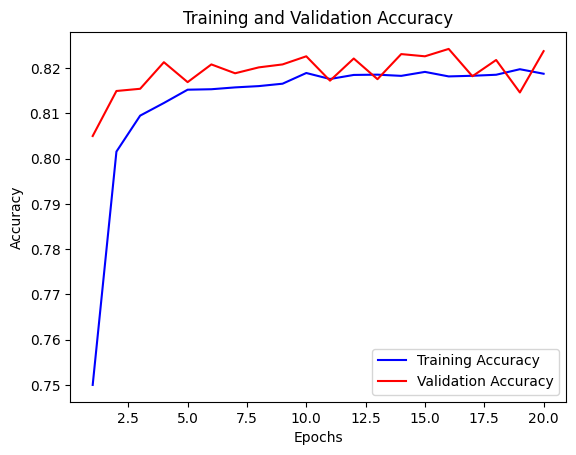

In [ ]:
# Get the accuracy values from the training history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the accuracy graph
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

192/192 [==============================] - 0s 2ms/step


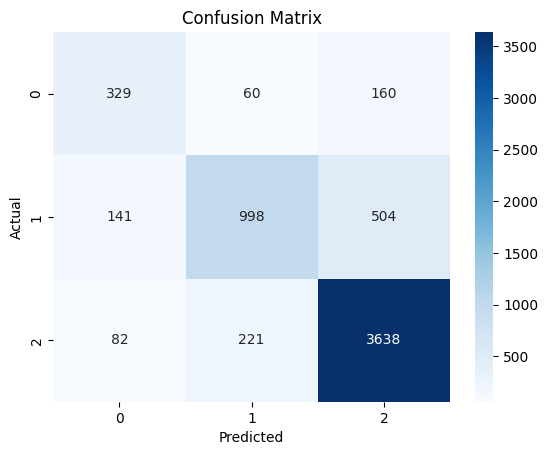

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#hard = 0 , med = 1 , soft = 2
# Make predictions on the validation set
y_val_pred_prob = hyper_model.predict(X_test)
y_val_pred = np.argmax(y_val_pred_prob, axis=1)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_val_pred)

# Plot the confusion matrix using seaborn
labels = np.unique(y_test)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

# Add labels and title to the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

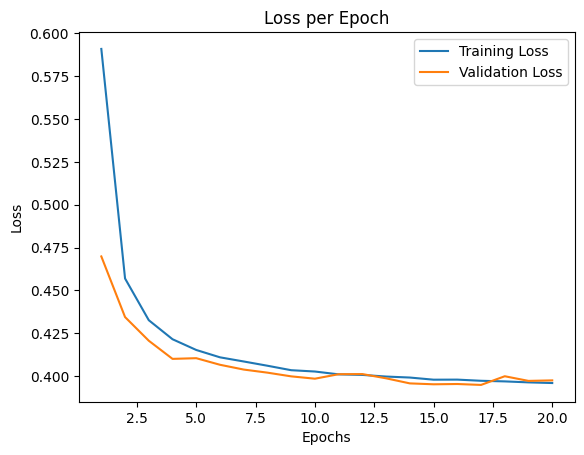

In [ ]:
loss = history.history['loss']
epochs = range(1, len(loss) + 1)  # Epochs count

# Plotting the training loss
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')

plt.title('Loss per Epoch')  # Title of the plot
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Loss')  # Y-axis label
plt.legend()  # Adding a legend to distinguish training vs. validation

plt.show()  # Display the plot

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_test_pred_prob = hyper_model.predict(X_test)

# Convert predicted probabilities to predicted labels
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

# Calculate evaluation metrics for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro', zero_division=0)
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

# Calculate and print the average evaluation metrics for the test set
print('Average Test Accuracy:', np.mean(test_accuracy))
print('Average Test Precision:', np.mean(test_precision))
print('Average Test Recall:', np.mean(test_recall))
print('Average Test F1 Score:', np.mean(test_f1))

192/192 [==============================] - 0s 2ms/step
Average Test Accuracy: 0.8237404206750367
Average Test Precision: 0.7566805843916554
Average Test Recall: 0.7308421570744338
Average Test F1 Score: 0.7395279826266096
